In [207]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import random
import time

In [208]:
def create_popu(nb_pop,nb_inf): #Crée la population
    popu = []
    dic_popu = {}
    id_p = 0
    num_inf = set()
    nb_inf_set = 0
    i = 0
    for i in range(0,nb_inf):
        num_inf.add(random.randint(0,nb_pop))
        nb_inf_set+=1
        while nb_inf_set>len(num_inf):
            num_inf.add(random.randint(0,nb_pop))
    for i in range(0,nb_pop):
        if i in num_inf:
            popu.append(1)
        else:
            popu.append(0)
    for id_p in range(len(popu)):
        dic_popu[id_p] = popu[id_p]
    return dic_popu

In [209]:
#POPU = create_popu(20,1) #Stocke la nouvelle population dans POPU

In [210]:
def create_counters(popu): #Crée les compteurs de population
    counters = {}
    for p in popu:
        if popu[p] == 1:
            counters[p] = 1
        else:
            counters[p] = 0
    return counters

In [211]:
#COUNTERS = create_counters(POPU) #Stocke les compteurs de population dans COUNTERS

In [212]:
def stats_popu(popu): #Retourne les statistiques de la population
    stat_popu = []
    nb_pop = 0
    nb_inf = 0
    for p in popu:
        nb_pop += 1
        if popu[p] == 1:
            nb_inf += 1
    stat_popu.append(nb_pop)
    stat_popu.append(nb_inf)
    return stat_popu

In [213]:
#VAR_GRAPH = 0.17 #Stocke la variable graphique dans VAR_GRAPH

In [214]:
def graph_popu(popu,var_graph): #Crée un graphique et les positions de la population
    g = nx.erdos_renyi_graph(len(popu),var_graph)
    pos = nx.drawing.layout.kamada_kawai_layout(g)
    return g,pos

In [215]:
#G,POS = graph_popu(POPU,VAR_GRAPH) #Stocke le graphique et les positions de la population POPU dans G et POS

In [216]:
def set_colors(popu): #Crée la liste de couleurs
    colors = []
    for p in popu:
        if popu[p] == 0:
            colors.append("green")
        elif popu[p] == 2:
            colors.append("blue")
        elif popu[p] == -1:
            colors.append("grey")
        else:
            colors.append("red")
    return colors

In [217]:
#COLORS = set_colors(POPU) #Stocke la liste des couleurs de la population POPU dans COLORS

In [218]:
def draw_pop(g,pos,colors,j): #Dessine le graphique de la population
    nx.draw(g,pos,with_labels=True,font_weight='bold',node_color=colors)
    plt.savefig("fig_"+str(j)+".jpg")
    plt.show()

In [219]:
def update_population(popu,counters,g): #Update la population
    for p in popu:
        if popu[p] == 1:
            if counters[p] < 7:
                counters[p] += 1
                edges = list(g.edges(p))
                for n1,n2 in edges:
                    ch_inf = random.randint(1,3)
                    if (ch_inf == 1) and (popu[n2] == 0):
                        popu[n2] = 1
            else:
                popu[p] = 2
                counters[p] = 0
        elif popu[p] == 2:
            if counters[p] < 7:
                counters[p] += 1
            else:
                popu[p] = 0
                counters[p] = 0
    return popu, counters

In [220]:
def update_graph(popu,g,pos,j): #Update le graphique
    colors = set_colors(popu)
    draw_pop(g,pos,colors,j)

In [221]:
def init_simul(nb_pop,nb_inf,var_graph): #Initialise la simulation et la retourne
    popu = create_popu(nb_pop,nb_inf)
    counters = create_counters(popu)
    g, pos = graph_popu(popu,var_graph)
    update_graph(popu,g,pos,"init")
    simul = (popu,counters,g,pos)
    return simul

In [222]:
def run_simul(simul,days): #Fais tourner la simulation
    popu, counters, g, pos = simul
    old_popu = popu
    old_counters = counters
    for j in range(days):
        new_popu, new_counters = update_population(old_popu,old_counters,g)
        update_graph(new_popu,g,pos,j)

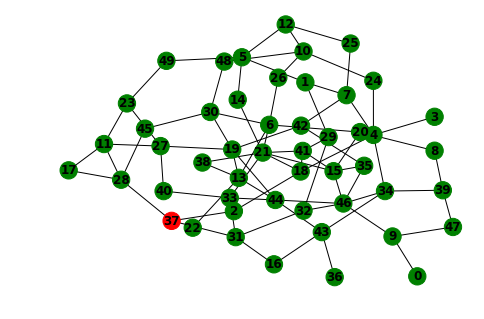

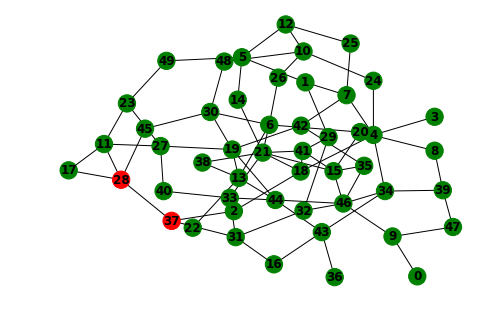

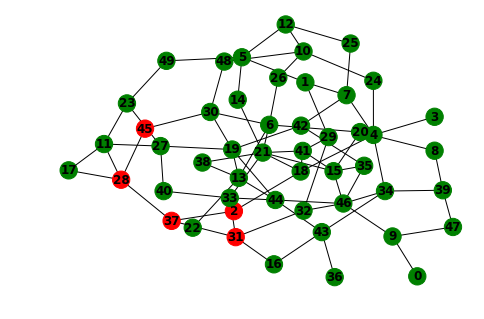

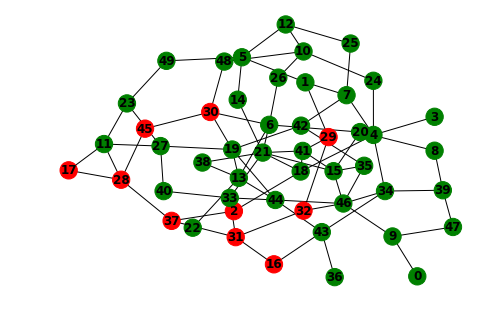

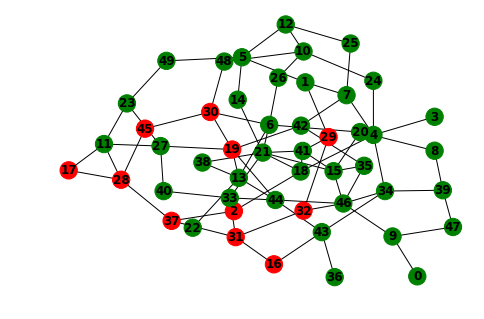

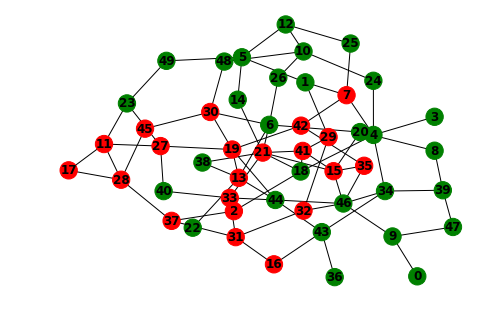

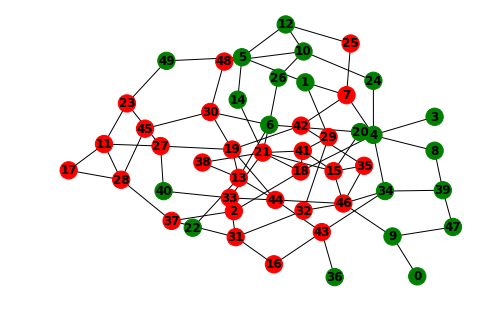

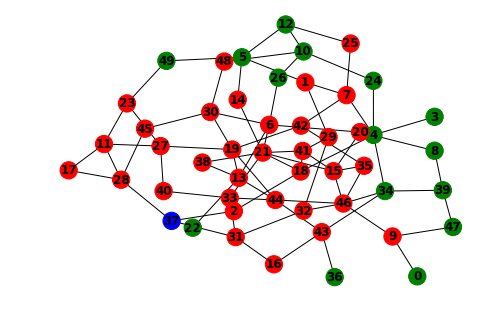

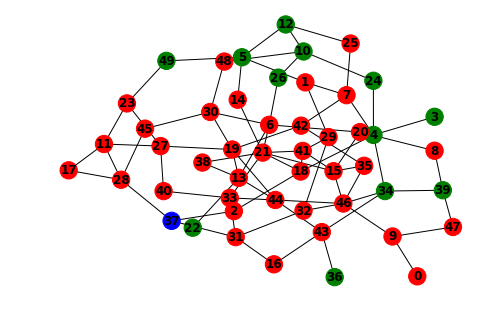

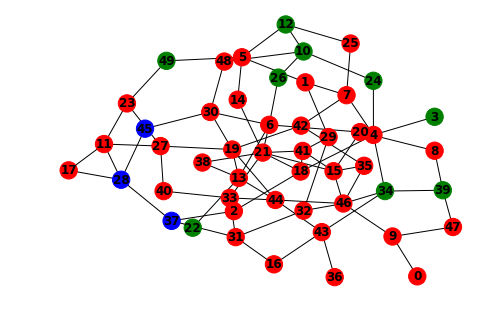

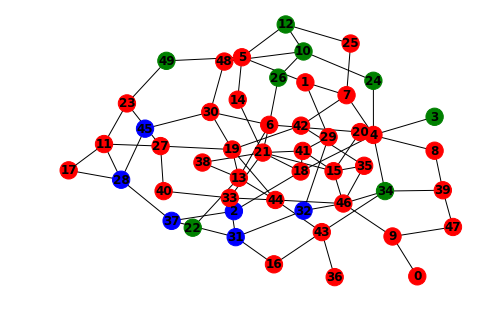

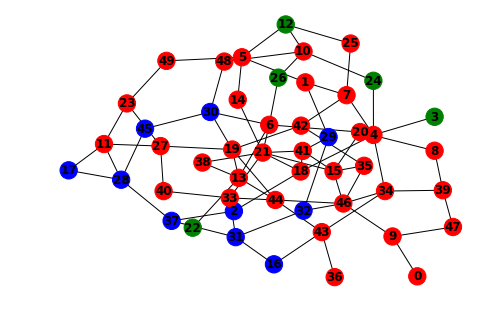

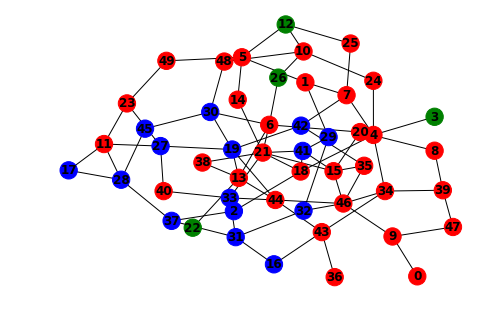

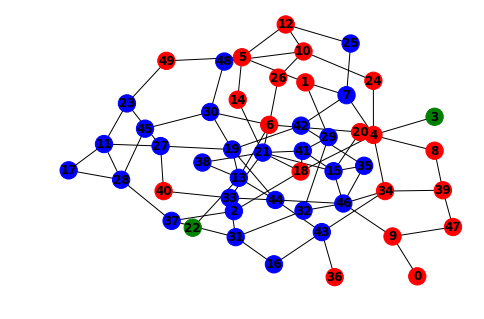

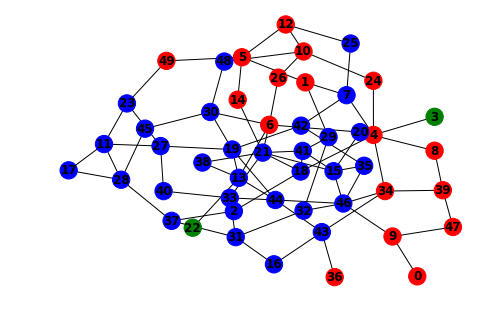

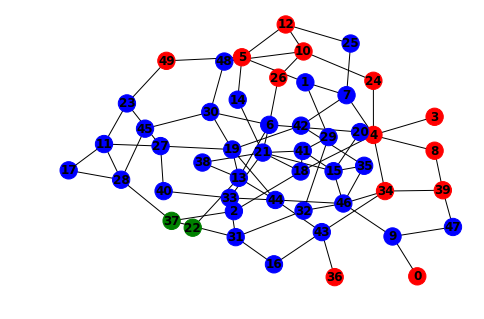

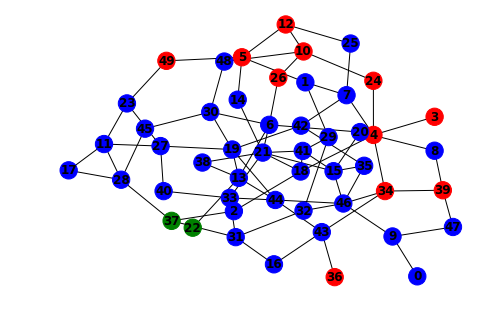

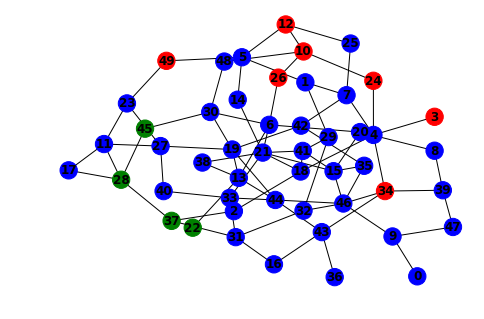

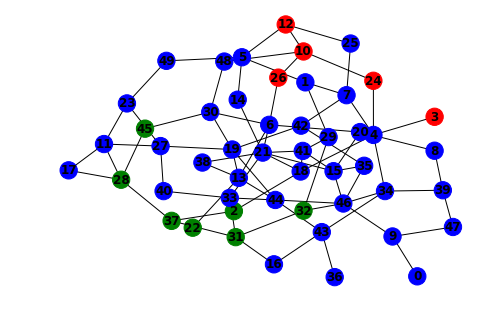

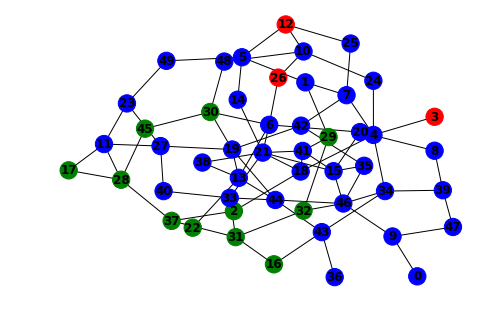

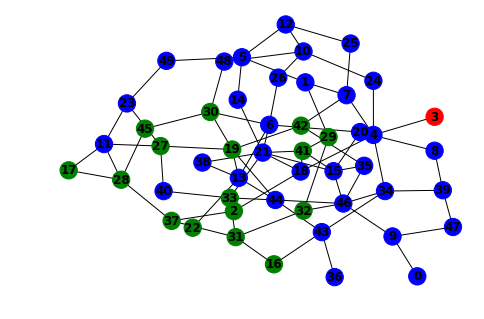

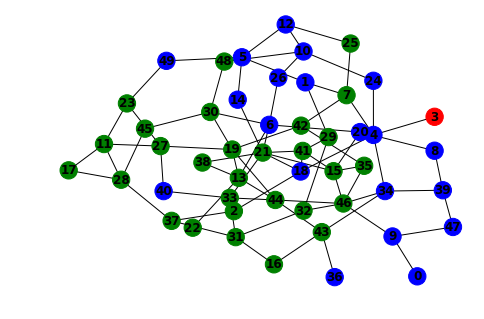

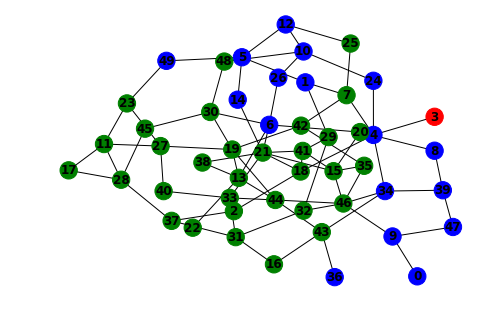

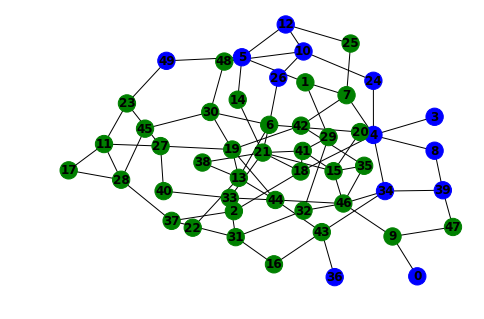

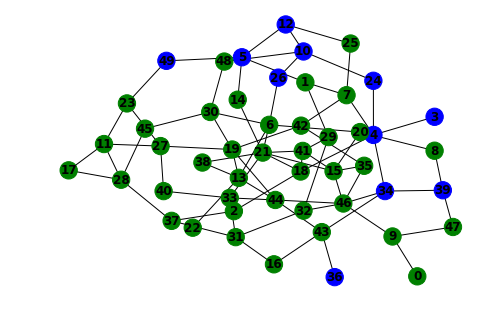

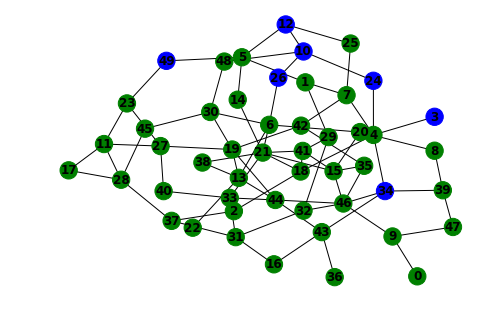

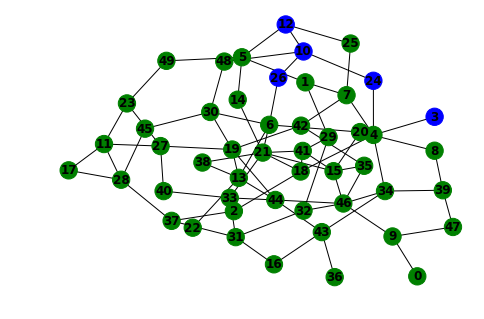

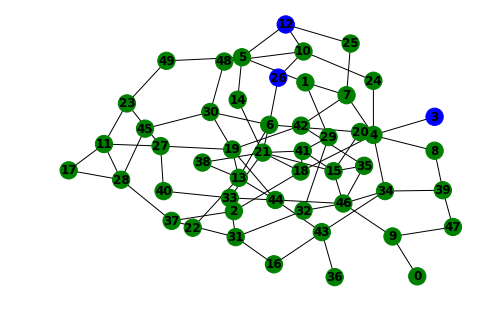

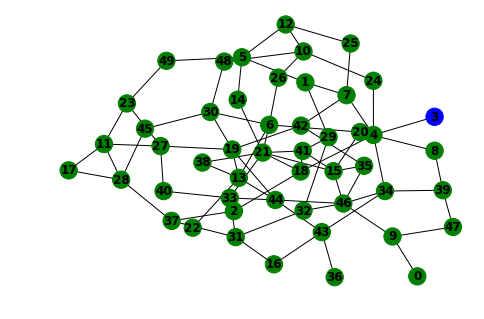

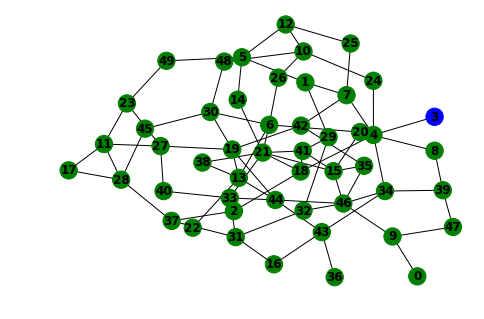

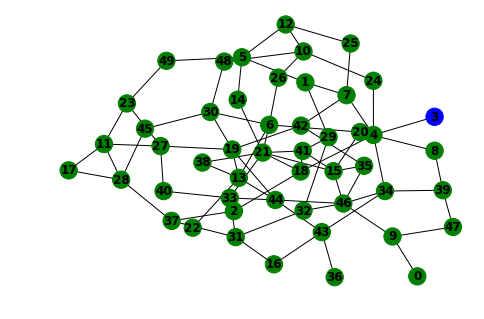

In [206]:
run_simul(init_simul(50,1,0.07),30)